### Problem statement 
#### To find out whether the customer is churned or not 

In [5]:
#import basic libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#load the dataset 

In [7]:
df=pd.read_csv("telecom_customer_churn.csv")
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7040      Credit Card          50.30         92.75           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7038           Stayed              NaN   

In [5]:
#basic checks 

In [14]:
#check for its shape 
df.shape

(7043, 38)

In [15]:
#check for its head 
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [17]:
#check for data frames maximum columns of head 
df.head(pd.set_option("display.max_columns",None))

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  Tenure in Months  \
0        93225  34.827662 -118.999073                    2                 9   
1        91206  34.162515 -118.203869                    0                 9   
2        92627  33.645672 -117.922613                    0                 4   
3        94553  38.014457 -122.115432                    1                13   
4        93010  34.227846 -119.079903                    3                 3   
...        ...        ...         ...                  ...               ...   
7038     91941  32.759327 -116.997260                    0                13   
7039     95367  37.734971 -120.954271                    1                22   
7040     95432  39.108252 -123.645121                    0                 2   
7041     92075  33.001813 -117.263628                    5                67   
7042     96125  39.600599 -120.636358                    1                63   

        Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0         NaN           Yes                              42.39             No   
1         NaN           Yes                              10.69            Yes   
2     Offer E           Yes                              33.65             No   
3     Offer D           Yes                              27.82             No   
4         NaN           Yes                               7.38             No   
...       ...           ...                                ...            ...   
7038  Offer D           Yes                              46.68             No   
7039  Offer D           Yes                              16.20            Yes   
7040  Offer E           Yes                              18.62             No   
7041  Offer A           Yes                               2.12             No   
7042      NaN            No                                NaN            NaN   

     Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0                 Yes         Cable                     16.0              No   
1                 Yes         Cable                     10.0              No   
2                 Yes   Fiber Optic                     30.0              No   
3                 Yes   Fiber Optic                      4.0              No   
4                 Yes   Fiber Optic                     11.0              No   
...               ...           ...                      ...             ...   
7038              Yes           DSL                     59.0             Yes   
7039              Yes   Fiber Optic                     17.0              No   
7040              Yes           DSL                     51.0              No   
7041              Yes         Cable                     58.0             Yes   
7042              Yes         Cable                      5.0             Yes   

     Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0              Yes                     No                  Yes          Yes   
1               No         

In [18]:
#check for its tail
df.tail()

Customer ID  Gender  Age Married  Number of Dependents          City  \
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  Tenure in Months  \
7038     91941  32.759327 -116.997260                    0                13   
7039     95367  37.734971 -120.954271                    1                22   
7040     95432  39.108252 -123.645121                    0                 2   
7041     92075  33.001813 -117.263628                    5                67   
7042     96125  39.600599 -120.636358                    1                63   

        Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
7038  Offer D           Yes                              46.68             No   
7039  Offer D           Yes                              16.20            Yes   
7040  Offer E           Yes                              18.62             No   
7041  Offer A           Yes                               2.12             No   
7042      NaN            No                                NaN            NaN   

     Internet Service Internet Type  Avg Monthly GB Download Online Security  \
7038              Yes           DSL                     59.0             Yes   
7039              Yes   Fiber Optic                     17.0              No   
7040              Yes           DSL                     51.0              No   
7041              Yes         Cable                     58.0             Yes   
7042              Yes         Cable                      5.0             Yes   

     Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
7038            No                     No                  Yes           No   
7039            No                     No                   No           No   
7040           Yes                     No                   No           No   
7041            No                    Yes                  Yes           No   
7042           Yes                    Yes                   No          Yes   

     Streaming Movies Streaming Music Unlimited Data        Contract  \
7038               No             Yes            Yes        One Year   
7039              Yes             Yes            Yes  Month-to-Month   
7040               No              No            Yes  Month-to-Month   
7041              Yes             Yes            Yes        Two Year   
7042              Yes             Yes            Yes        Two Year   

     Paperless Billing   Payment Method  Monthly Charge  Total Charges  \
7038                No      Credit Card           55.15         742.90   
7039               Yes  Bank Withdrawal           85.10        1873.70   
7040               Yes      Credit Card           50.30          92.75   
7041                No      Credit Card           67.85        4627.65   
7042                No  Bank Withdrawal           59.00        3707.60   

      Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
7038            0.0                         0                       606.84   
7039            0.0                         0                       356.40   
7040            0.0                         0                        37.24   
7041            0.0                         0                       142.04   
7042            0.0                         0                         0.00   

      Total Revenue Customer Status   Churn Category             Churn Reason  
7038        1349.74          Stayed              NaN                      NaN  
7039        2230.10         Churned  Dissatisfaction  Product dissatisfaction  
7040         129.99          Jo

In [20]:
#check for its statistical description
df.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [25]:
#check statistical description for objects also 
df.describe(include="O")

Customer ID Gender Married         City    Offer Phone Service  \
count         7043   7043    7043         7043     3166          7043   
unique        7043      2       2         1106        5             2   
top     9995-HOTOH   Male      No  Los Angeles  Offer B           Yes   
freq             1   3555    3641          293      824          6361   

       Multiple Lines Internet Service Internet Type Online Security  \
count            6361             7043          5517            5517   
unique              2                2             3               2   
top                No              Yes   Fiber Optic              No   
freq             3390             5517          3035            3498   

       Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
count           5517                   5517                 5517         5517   
unique             2                      2                    2            2   
top               No                     No                   No           No   
freq            3088                   3095                 3473         2810   

       Streaming Movies Streaming Music Unlimited Data        Contract  \
count              5517            5517           5517            7043   
unique                2               2              2               3   
top                  No              No            Yes  Month-to-Month   
freq               2785            3029           4745            3610   

       Paperless Billing   Payment Method Customer Status Churn Category  \
count               7043             7043            7043           1869   
unique                 2                3               3              5   
top                  Yes  Bank Withdrawal          Stayed     Competitor   
freq                4171             3909            4720            841   

                         Churn Reason  
count                            1869  
unique                             20  
top     Competitor had better devices  
freq                              313

In [21]:
#check for its datatypes
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [22]:
#check for its columns names 
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [24]:
#check for its missing valeus 
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [17]:
#insights 
#data quality is descent but needs to be cleaned 
#missing values must be handles before machine learning 
#Customer status can be taken as the output variable 
#joined customers in the customer status cannot be considered as churned because they are ot churned yet 

### EDA (Exploratory data analysis)

<Axes: xlabel='Customer Status', ylabel='Count'>

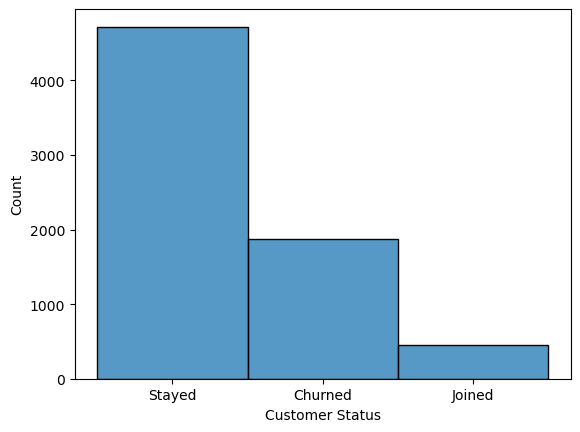

In [9]:
#univariate 
sns.histplot(data=df,x="Customer Status")

In [19]:
#insights
#Stayed customers are more 
#churned customers are fewer in numbers 
#this is not normaly distributed data so that it can affect the model performance

<Axes: xlabel='Age', ylabel='Count'>

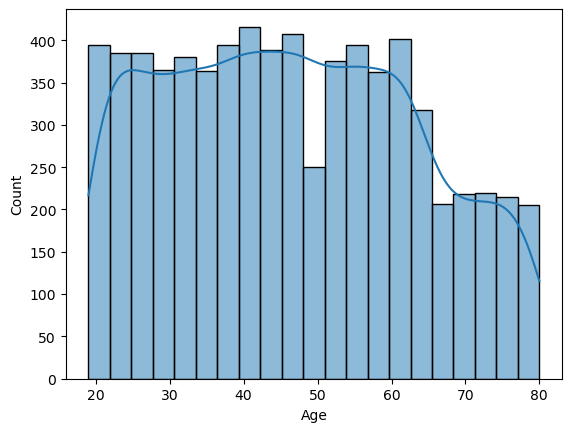

In [10]:
#lets check age distribution
sns.histplot(data=df,x="Age",kde=True)

In [20]:
#insights 
#most of the customers are in the age group of 20-60 years old 

<Axes: xlabel='Monthly Charge', ylabel='Count'>

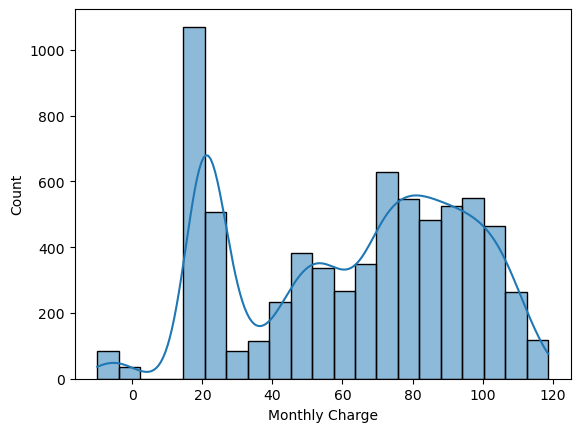

In [12]:
#monthly charge distribution 
sns.histplot(data=df,x="Monthly Charge",kde=True)

In [22]:
#insights
#broad range of charging customers 
#High charging customers are more likely going to churn 

<Axes: xlabel='Contract', ylabel='count'>

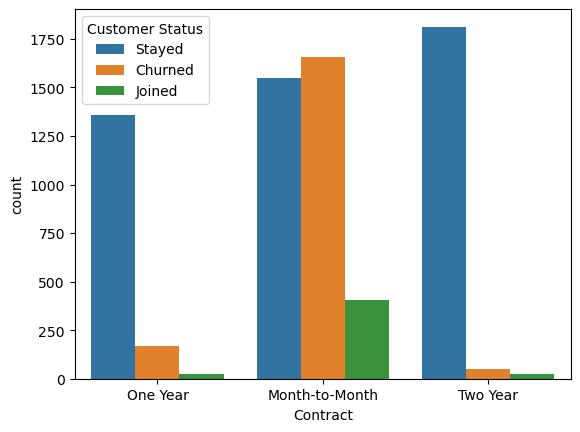

In [16]:
#bivariate
#check customers status with contract type 
sns.countplot(data=df,x="Contract",hue="Customer Status")

In [23]:
#insights 
#month to month contract people are highly churned 
#2 years contract peoples are churned the least 

In [25]:
#insights 
#contract type is the strong perdictor of the churn 
#Higher charges are leading to missatisfaction
#class imbalance must be handled carefully

In [3]:
#multivariate

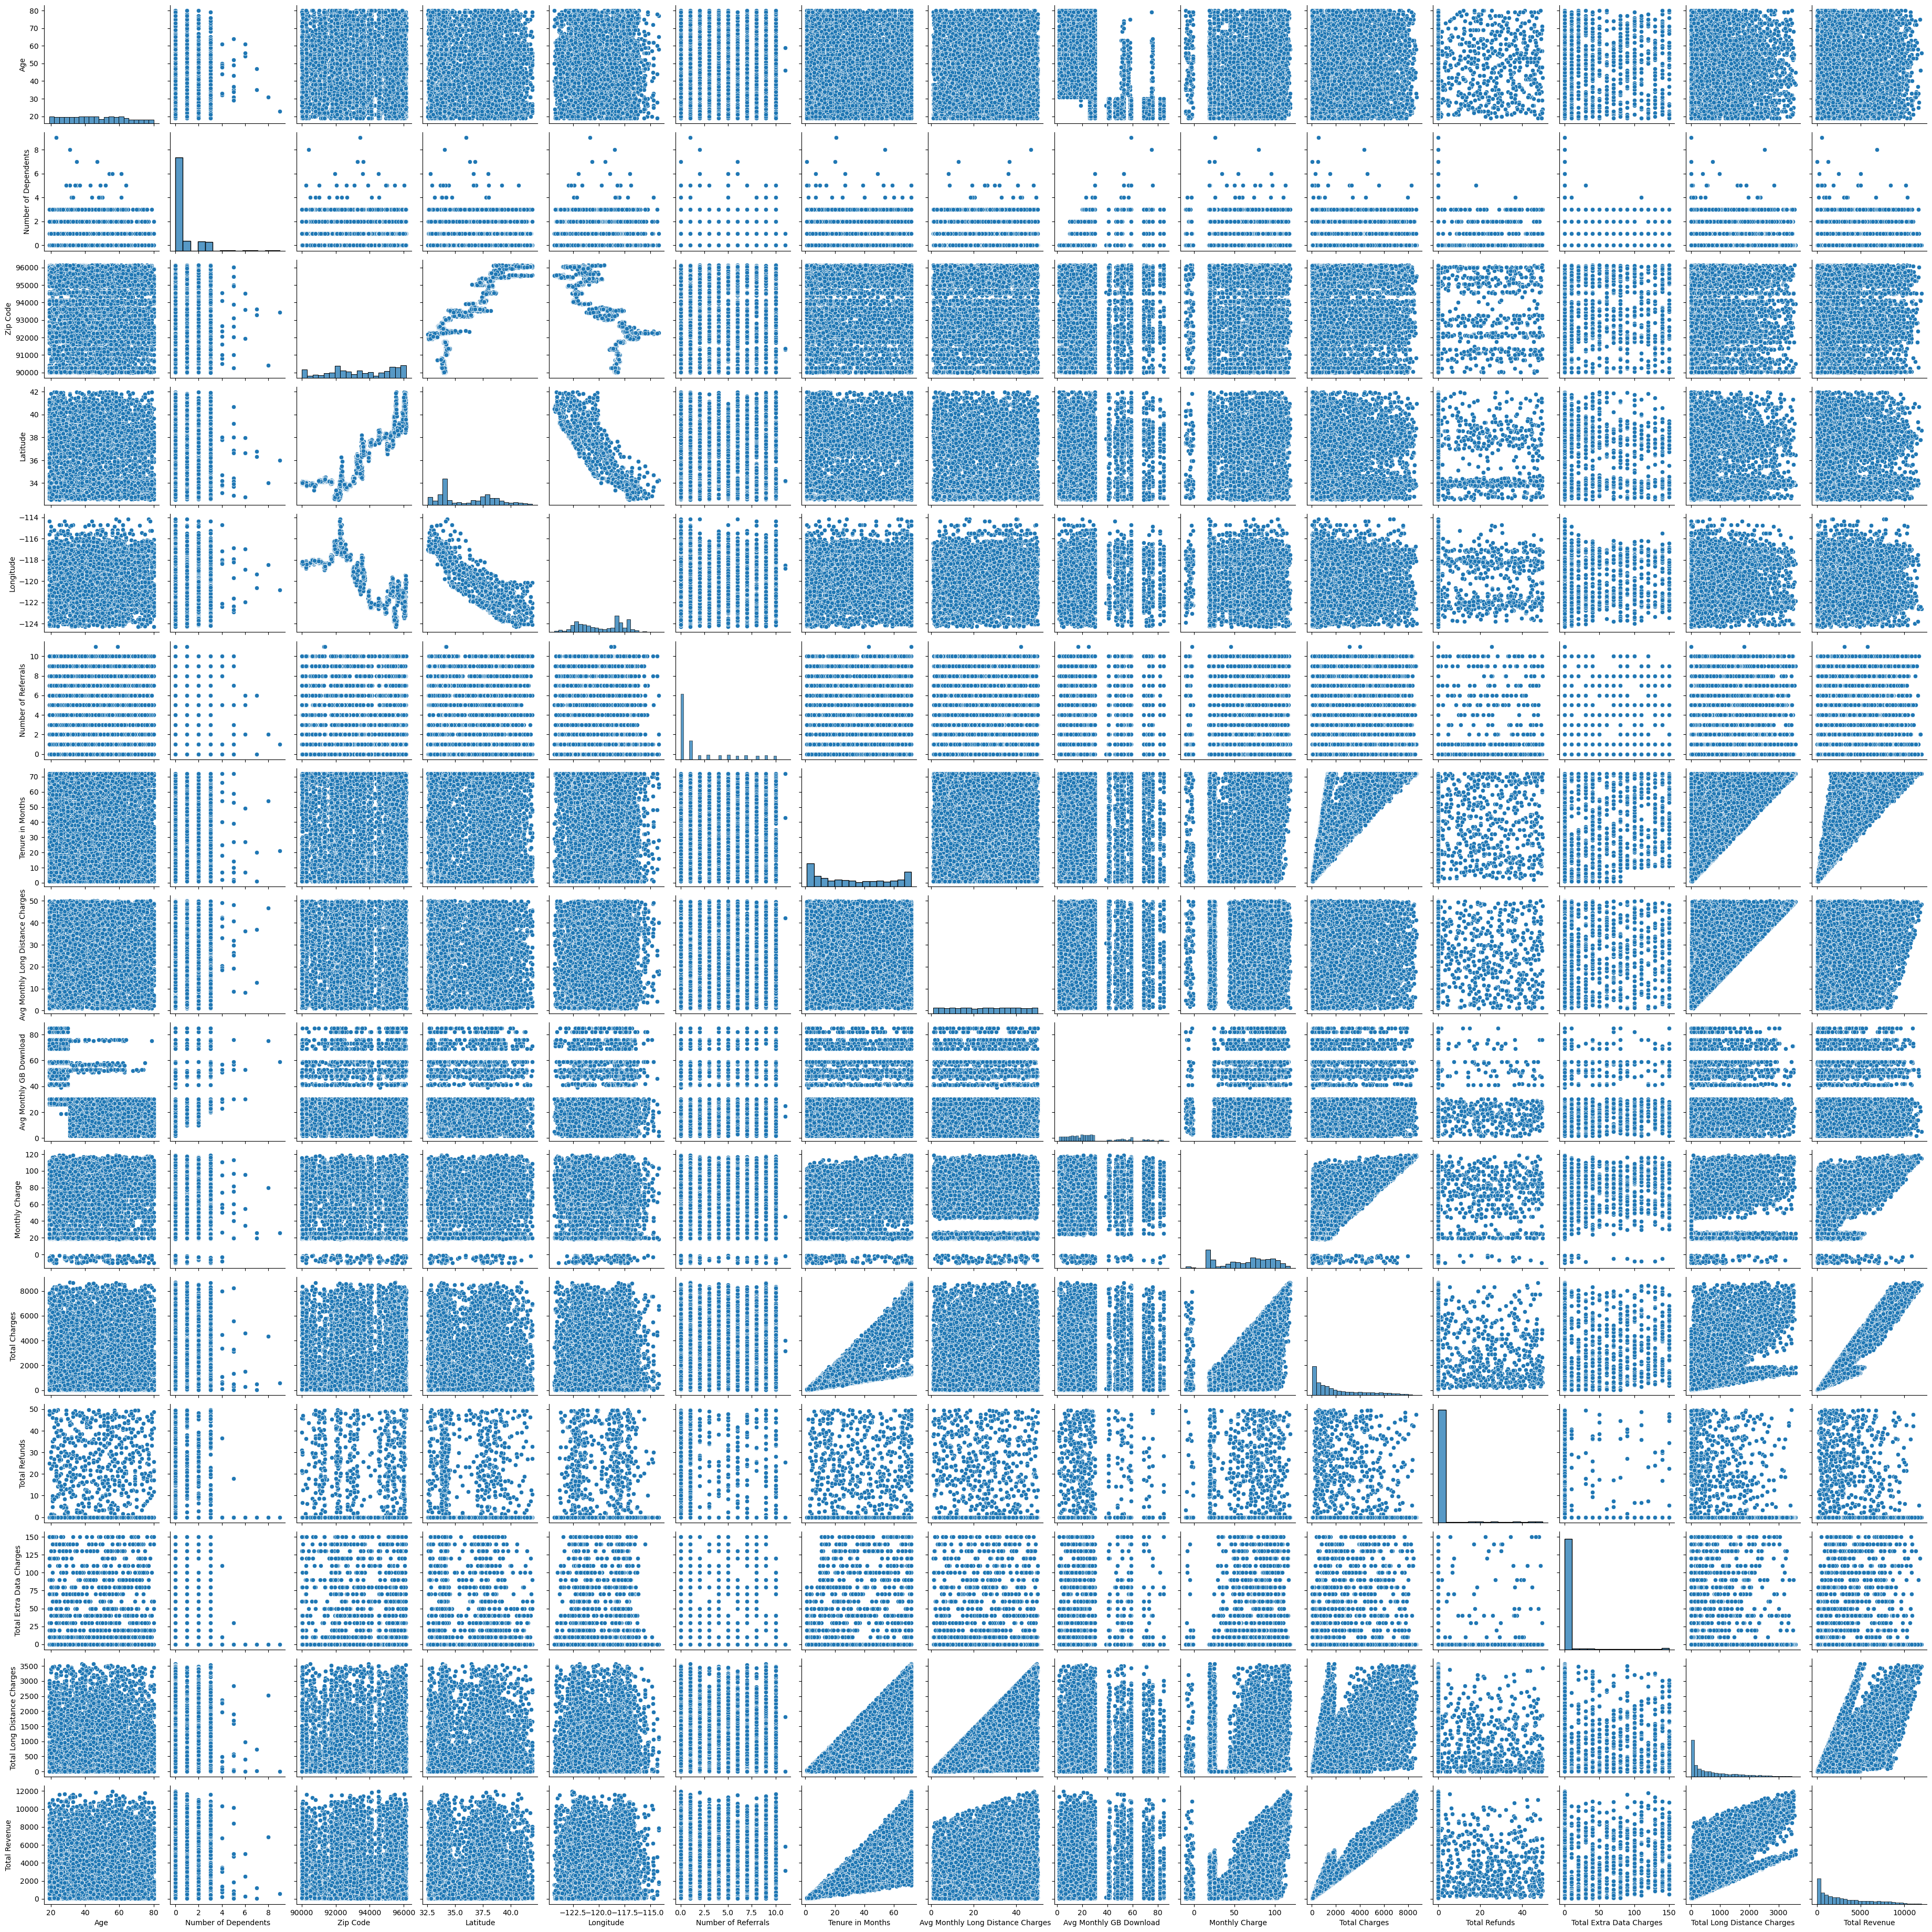

In [24]:
sns.pairplot(df)

In [26]:
#in this data we have more columns so that we can visualize this pairplot and analyse so that it just a picture representation of pairplot of how it will be 

### FEATURE ENGINEERING 

In [27]:
#first as we discussed we need to consider only churned and stayed in the target 
#we must denote churned =0 and stayed =1 
#skipping joined 

In [40]:
#target variable creation 
#keep only stayed and churned rows for modelling 
df_model=df[df["Customer Status"].isin(["Stayed","Churned"])].copy()
#create binary target: 1=Churned amd 0=stayed 
df_model["Churn"]=(df_model["Customer Status"]=="Churned").astype(int)

In [41]:
df_model.Churn.value_counts()

Churn
0    4720
1    1869
Name: count, dtype: int64

In [39]:
#final dataset only contains meaningful customer journeys
#now ready for binary classification

In [42]:
df_model["Tenure in Months"] = df_model["Tenure in Months"].replace(0, np.nan)
df_model["Revenue_per_Month"] = df_model["Total Revenue"] / df_model["Tenure in Months"]
df_model["Revenue_per_Month"] = df_model["Revenue_per_Month"].fillna(0)

In [43]:
#insights 
#Customers who generate high revenue per month might churn if their cost is high.
#Feature helps model learn behavioral patterns

### Feature selection

In [44]:
#dropping the columns that aare not used for machine learning 
#that are leakage for the dataset

In [46]:
df_model.drop(["Customer Status", "Churn Category", "Churn Reason","Customer ID"],axis=1,inplace=True)
target_cols="Churn"

In [48]:
x=df_model.drop(columns=[target_cols])
y=df_model[target_cols]

In [50]:
x.columns.tolist()

['Gender',
 'Age',
 'Married',
 'Number of Dependents',
 'City',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Revenue_per_Month']

In [51]:
df_model

Gender  Age Married  Number of Dependents          City  Zip Code  \
0     Female   37     Yes                     0  Frazier Park     93225   
1       Male   46      No                     0      Glendale     91206   
2       Male   50      No                     0    Costa Mesa     92627   
3       Male   78     Yes                     0      Martinez     94553   
4     Female   75     Yes                     0     Camarillo     93010   
...      ...  ...     ...                   ...           ...       ...   
7037  Female   36      No                     0     Fallbrook     92028   
7038  Female   20      No                     0       La Mesa     91941   
7039    Male   40     Yes                     0     Riverbank     95367   
7041    Male   21     Yes                     0  Solana Beach     92075   
7042    Male   36     Yes                     0   Sierra City     96125   

       Latitude   Longitude  Number of Referrals  Tenure in Months  ...  \
0     34.827662 -118.999073                    2                 9  ...   
1     34.162515 -118.203869                    0                 9  ...   
2     33.645672 -117.922613                    0                 4  ...   
3     38.014457 -122.115432                    1                13  ...   
4     34.227846 -119.079903                    3                 3  ...   
...         ...         ...                  ...               ...  ...   
7037  33.362575 -117.299644                    0                 4  ...   
7038  32.759327 -116.997260                    0                13  ...   
7039  37.734971 -120.954271                    1                22  ...   
7041  33.001813 -117.263628                    5                67  ...   
7042  39.600599 -120.636358                    1                63  ...   

     Paperless Billing   Payment Method  Monthly Charge Total Charges  \
0                  Yes      Credit Card           65.60        593.30   
1                   No      Credit Card           -4.00        542.40   
2                  Yes  Bank Withdrawal           73.90        280.85   
3                  Yes  Bank Withdrawal           98.00       1237.85   
4                  Yes      Credit Card           83.90        267.40   
...                ...              ...             ...           ...   
7037                No  Bank Withdrawal           20.95         85.50   
7038                No      Credit Card           55.15        742.90   
7039               Yes  Bank Withdrawal           85.10       1873.70   
7041                No      Credit Card           67.85       4627.65   
7042                No  Bank Withdrawal           59.00       3707.60   

     Total Refunds Total Extra Data Charges  Total Long Distance Charges  \
0             0.00                        0                       381.51   
1            38.33                       10                        96.21   
2             0.00                        0                       134.60   
3             0.00                        0                       361.66   
4             0.00                        0                        22.14   
...            ...                      ...                          ...   
7037          0.00                        0                         8.04   
7038          0.00                        0                       606.84   
7039          0.00                        0                       356.40   
7041          0.00                        0                       142.04   
7042          0.00                        0                         0.00   

     Total Revenue Churn Revenue_per_Month  
0           974.81     0        108.312222  
1           610.28     0         67.808889  
2           415.45     1        103.862500  
3          1599.51     1        123.039231  
4           289.54     1         96.513333  
...            ...   ...               ...  
7037         93.54     1         23.385000  
7038       1349.74     0        103.826154  
7039     

In [54]:
#identify numerical and categorical columns
numerical_feature=x.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_feature=x.select_dtypes(include=["object"]).columns.tolist()

print("numerical features are:",numerical_feature)

numerical features are: ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Revenue_per_Month']


In [55]:
print("cateorical features are:",categorical_feature)

cateorical features are: ['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


### Train Test Split

In [61]:
#import library from sklearn 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [63]:
x_test.shape

(1318, 35)

In [64]:
x_train.shape

(5271, 35)

In [65]:
#although we have finished training and testing our data in the ratio of 80:20 that why we have given test size =0.20
#now we move to preprocessing techniques

### Preprocessing pipelines

In [69]:
#import pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [72]:
# Numeric: impute median + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical: impute most frequent + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_feature),
        ("cat", categorical_transformer, categorical_feature)
    ]
)

In [74]:
#insights
#pipeline ensures consistent clean and good data for modelling 
#avoids training and testing mismatch 

### Model Building 

In [80]:
#importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
#intialise the model 
model=RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1)

In [81]:
clf = Pipeline(steps=[("preprocess", preprocessor),("model", model)])

In [82]:
#insights 
#why we choose random forest classifier 
#it handles mixed data types 
#missing values 
#non linear patterns 
#high dimemsional catregorical data 

#randomforest reduces overfitting and give stable results 
#good base line for churn problems 

In [83]:
#training the model 
clf.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Number of Dependents',
                                                   'Zip Code', 'Latitude',
                                                   'Longitude',
                                                   'Number of Referrals',
                                                   'Tenure in Months',
                                                   'Avg Monthly Long Distance '
                                                   'Charges',
                                                   'Avg Monthly GB Download',
                                                   'Monthly Charge',
                                                   'Total Charges',
                                                   'Tot...
                                                  ['Gender', 'Married', 'City',
                                                   'Offer', 'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Internet Type',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection Plan',
                                                   'Premium Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Streaming Music',
                                                   'Unlimited Data', 'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])

### Predictions

In [84]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [85]:
y_test

4196    0
5678    1
2267    0
6252    0
1822    1
       ..
5122    0
455     0
6681    1
1426    0
4979    1
Name: Churn, Length: 1318, dtype: int64

In [86]:
#we can understand that model has learnt more similarities with y_testing values to give the predicted 

### Evaluating the model 

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score

In [90]:
accuracy_score(y_test,y_pred)

0.8611532625189682

In [91]:
confusion_matrix(y_test,y_pred)

array([[905,  39],
       [144, 230]])

In [93]:
roc_auc_score(y_test,y_pred)

np.float64(0.7868298513550258)

In [94]:
f1_score(y_test,y_pred)

0.7153965785381027

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       944
           1       0.86      0.61      0.72       374

    accuracy                           0.86      1318
   macro avg       0.86      0.79      0.81      1318
weighted avg       0.86      0.86      0.85      1318



In [1]:
#accuracy we have got is 86% 
#it is a good result 
#but we can check that we can boost the score or not with Hyperparameter tuning 